In [103]:
#dependents
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
from scipy import stats
import operator

#create imporsonment data url
Imprisonment_baseUrl = "https://api.ed.gov/data/mbk-imprisonment?"
Imprisonment_apiKey = "api_key=DTeVODnGRjLME8jd6PQCOy1DpgLqXPdHWtGO4EqA"
Imprisonment_perPage = "per_page=" + "195"
Imprisonment_url = Imprisonment_baseUrl + Imprisonment_apiKey + "&" + Imprisonment_perPage

#request and get data as "ImprisonmentData" through url
ImprisonmentData = requests.get(Imprisonment_url).json()

#get length of imprisonment dataframe entries 
Imprisonment_length = len(ImprisonmentData["resources"])

#initialize lists for data pull from request
YearList = [] 
RaceEthnicityList = []
SexLists = []
CountList = []
CountPerCapitaList = []

#pull all data from requested data and put into lists for each column
for i in range (Imprisonment_length):
    YearList.append(int(ImprisonmentData["resources"][i]["Year"]))
    RaceEthnicityList.append(ImprisonmentData["resources"][i]["Race/ethnicity"])
    SexLists.append(ImprisonmentData["resources"][i]["Sex"])
    CountList.append(int(ImprisonmentData["resources"][i]["Count"]))
    CountPerCapitaList.append(int(ImprisonmentData["resources"][i]["Rate per 100,000"]))

#create dataframe and input all lists
imprisonmentDf = pd.DataFrame({
    "Year" : YearList,
    "Race/Ethnicity" : RaceEthnicityList,
    "Sex" : SexLists,
    "Count" : CountList,
    "Per Capita Rate per 100,000" : CountPerCapitaList
})

#show imprisonment dataframe
imprisonmentDf.sort_values(by=["Year", "Race/Ethnicity"], ascending=True).head(16)


,Year,Race/Ethnicity,Sex,Count,"Per Capita Rate per 100,000"
52,2000,"Black, non-Hispanic",None,104880,2732
104,2000,"Black, non-Hispanic",Male,101521,5358
156,2000,"Black, non-Hispanic",Female,3500,180
65,2000,Hispanic,None,48696,1004
117,2000,Hispanic,Male,46949,1765
169,2000,Hispanic,Female,1596,73
78,2000,"Other race, non-Hispanic",None,15350,826
130,2000,"Other race, non-Hispanic",Male,14504,1557
182,2000,"Other race, non-Hispanic",Female,869,94
39,2000,"White, non-Hispanic",None,59129,345


In [2]:
#replacing all races with standard races
imprisonmentDf = imprisonmentDf.replace("White, non-Hispanic", "Caucasian")
imprisonmentDf = imprisonmentDf.replace("Black, non-Hispanic", "African American")
imprisonmentDf = imprisonmentDf.replace("Other race, non-Hispanic", "Other")
imprisonmentDf.sort_values(by=["Year", "Race/Ethnicity"], ascending=True).head(16)


,Year,Race/Ethnicity,Sex,Count,"Per Capita Rate per 100,000"
52,2000,African American,None,104880,2732
104,2000,African American,Male,101521,5358
156,2000,African American,Female,3500,180
39,2000,Caucasian,None,59129,345
91,2000,Caucasian,Male,55602,639
143,2000,Caucasian,Female,3498,41
65,2000,Hispanic,None,48696,1004
117,2000,Hispanic,Male,46949,1765
169,2000,Hispanic,Female,1596,73
78,2000,Other,None,15350,826


In [3]:
#CREATE LIST OF RACES
raceList = ["African American", "Caucasian", "Hispanic", "Other"]
raceList

['African American', 'Caucasian', 'Hispanic', 'Other']

In [4]:
#Pull CSV - Drop Out Data
dropOut_df = pd.read_csv("../CSVs/Total_drop_out_rates_by_year_and_race.csv")
dropOut_df = dropOut_df.rename(columns={"Dropout White" : "Caucasian", "Dropout Black" : "African American", "Dropout Hispanic" : "Hispanic", "Dropout other" : "Other"})
dropOut_df = dropOut_df.set_index("Year")
print(dropOut_df.columns)
#reorder columns
dropOut_df = dropOut_df[raceList]

#Pull CSV - 2000-2007
dropOut_00_07_df = pd.read_csv("../CSVs/Total_drop_out_rates_by_race(2000-2007).csv")
dropOut_00_07_df = dropOut_00_07_df.rename(columns={"Dropout White" : "Caucasian", "Dropout Black" : "African American", "Dropout Hispanic" : "Hispanic", "Dropout other" : "Other"})
dropOut_00_07_df = dropOut_00_07_df.set_index("Year")
#reorder columns
dropOut_00_07_df = dropOut_00_07_df[raceList]

#Pull CSV - Drop Out Data
dropOut_08Plus_df = pd.read_csv("../CSVs/Total_drop_out_rates_by_race(2008+).csv")
dropOut_08Plus_df = dropOut_08Plus_df.rename(columns={"Dropout White" : "Caucasian", "Dropout Black" : "African American", "Dropout Hispanic" : "Hispanic", "Dropout other" : "Other"})
dropOut_08Plus_df = dropOut_08Plus_df.set_index("Year")
#reorder columns
dropOut_08Plus_df = dropOut_08Plus_df[raceList]
print(dropOut_df)
print(dropOut_00_07_df)
print(dropOut_08Plus_df)

Index(['Caucasian', 'African American', 'Hispanic', 'Other'], dtype='object')
      African American  Caucasian  Hispanic  Other
Year                                              
2000              28.8       18.2      43.3  22.95
2001              29.0       17.9      42.8  22.80
2002              27.5       18.5      41.6  23.00
2003              27.7       17.6      39.7  19.95
2004              25.4       17.2      39.0  25.75
2005              26.1       16.8      37.9  22.55
2006              23.3       16.6      37.3  21.15
2007              23.6       17.2      34.6  23.80
2008              24.1       15.6      33.0  23.90
2009              24.0       15.4      31.2  17.25
2010              23.6       15.5      30.8  20.05
2011              23.7       15.9      28.8  19.85
2012              21.3       15.8      26.5  18.30
      African American  Caucasian  Hispanic  Other
Year                                              
2000              28.8       18.2      43.3  22.95
2001

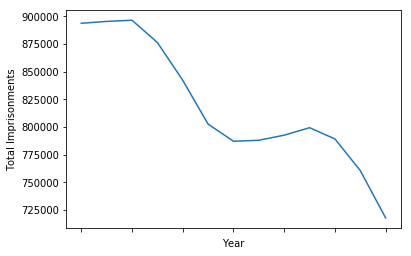

,Count
Year,
2000,893622
2001,895291
2002,896351
2003,876281
2004,842133
2005,802579
2006,787099
2007,787982
2008,792600


In [6]:
#IMPRISONMENTS TOTAL COUNT FOR ALL RACES AND ALL GENDERS
imprisonmentDf_totalImprisonments = pd.DataFrame(imprisonmentDf.groupby(["Year"])["Count"].sum())
imprisonmentGraph_totalImprisonments = imprisonmentDf_totalImprisonments.unstack(level=-1).plot(kind="line", legend=False)
imprisonmentGraph_totalImprisonments.set_ylabel("Total Imprisonments")
imprisonmentGraph_totalImprisonments.set_xlabel("Year")
plt.show()
imprisonmentDf_totalImprisonments

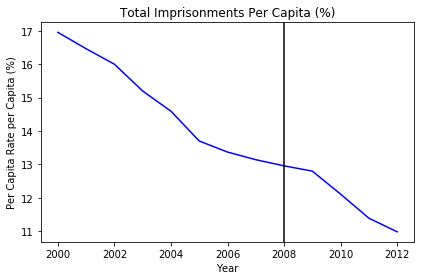

In [7]:
#IMPRISONMENTS TOTAL COUNT FOR ALL RACES AND ALL GENDERS - PER CAPITA
imprisonmentDf_totalImprisonmentsPerCapita = pd.DataFrame(imprisonmentDf.groupby(["Year"])["Per Capita Rate per 100,000"].sum()/100000*100)
imprisonmentDf_totalImprisonmentsPerCapita.to_csv("../CSVs/imprisonmentDf_totalImprisonmentsPerCapita_Percent.csv")
plt.plot(imprisonmentDf_totalImprisonmentsPerCapita.index, imprisonmentDf_totalImprisonmentsPerCapita["Per Capita Rate per 100,000"], '-', color='blue')
plt.title("Total Imprisonments Per Capita (%)")
plt.xlabel("Year")
plt.ylabel("Per Capita Rate per Capita (%)")
plt.axvline(x=2008, ymin=0, ymax=1, color="black")
plt.tight_layout()
plt.savefig('../Graphs/Imprisonments Per Capita (%) - Total between 2000 and 2012.png')
plt.show()


In [ ]:
#GRAPH IMPRISONMENTS PER RACE

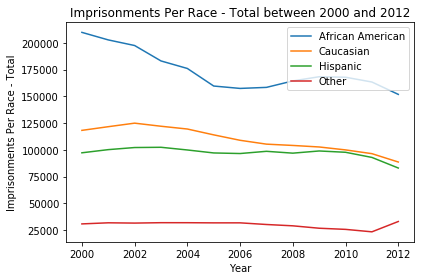

In [8]:
#GRAPH TOTAL IMPRISONMENTS PER RACE
#get imprisonment count per race
#Adds gender counts together into single race count
#unstacks -1 and then stacks 0
imprisonmentDf_total_PerRace = pd.DataFrame(imprisonmentDf.groupby(["Year", "Race/Ethnicity"])["Count"].sum()).unstack(level=-1).stack(level=0) 
imprisonmentDf_total_PerRace.reset_index(level=0, inplace=True)
imprisonmentDf_total_PerRace = imprisonmentDf_total_PerRace.set_index('Year')
imprisonmentDf_total_PerRace = imprisonmentDf_total_PerRace.rename_axis("", axis="columns")
imprisonmentDf_total_PerRace = imprisonmentDf_total_PerRace[raceList]

#write CSV
imprisonmentDf_total_PerRace.to_csv("../CSVs/imprisonmentDf_total_PerRace.csv")

#plot
for i in raceList:
    plt.plot(imprisonmentDf_total_PerRace.index, imprisonmentDf_total_PerRace[i])

#format
plt.legend(labels=imprisonmentDf_total_PerRace.columns, loc="best", markerscale=.5)
plt.xlabel("Year")
plt.ylabel("Imprisonments Per Race - Total")
plt.title("Imprisonments Per Race - Total between 2000 and 2012")
plt.tight_layout()
plt.savefig('../Graphs/Imprisonments Per Race - Total between 2000 and 2012.png')
#imprisonmentDf_total_PerRace

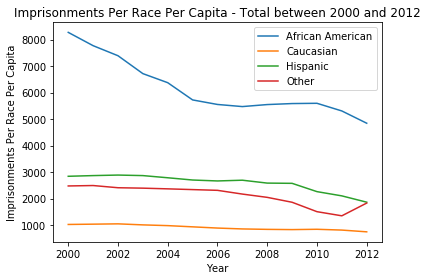

In [10]:
#GRAPH TOTAL IMPRISONMENTS PER RACE PER CAPITA %
#get imprisonment count per race
#Adds gender counts together into single race count
#unstacks -1 and then stacks 0
imprisonmentDf_perRace_perCapita = pd.DataFrame(imprisonmentDf.groupby(["Year", "Race/Ethnicity"])["Per Capita Rate per 100,000"].sum()).unstack(level=-1).stack(level=0) 
imprisonmentDf_perRace_perCapita.reset_index(level=0, inplace=True)
imprisonmentDf_perRace_perCapita = imprisonmentDf_perRace_perCapita.set_index('Year')
imprisonmentDf_perRace_perCapita = imprisonmentDf_perRace_perCapita.rename_axis("", axis="columns")
imprisonmentDf_perRace_perCapita = imprisonmentDf_perRace_perCapita[raceList]

#write CSV
imprisonmentDf_perRace_perCapita.to_csv("../CSVs/imprisonmentDf_perRace_perCapita.csv")

#plot
for i in raceList:
    plt.plot(imprisonmentDf_perRace_perCapita.index, imprisonmentDf_perRace_perCapita[i])

#format
plt.legend(labels=imprisonmentDf_perRace_perCapita.columns, loc="best", markerscale=.5)
plt.xlabel("Year")
plt.ylabel("Imprisonments Per Race Per Capita")
plt.title("Imprisonments Per Race Per Capita - Total between 2000 and 2012")
plt.tight_layout()
plt.savefig('../Graphs/Imprisonments Per Race Per Capita - Total between 2000 and 2012.png')
#imprisonmentDf_perRace_perCapita

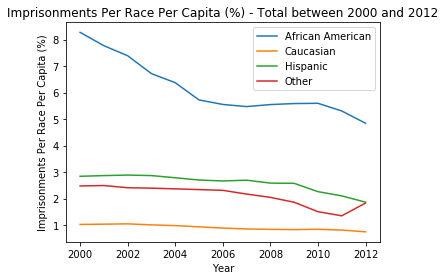

In [11]:
#GRAPH TOTAL IMPRISONMENTS PER RACE PER CAPITA %
for i in raceList:
    plt.plot(imprisonmentDf_perRace_perCapita.index, imprisonmentDf_perRace_perCapita[i]/1000)
    
plt.legend(labels=imprisonmentDf_perRace_perCapita.columns, loc="best", markerscale=.5)
plt.xlabel("Year")
plt.ylabel("Imprisonments Per Race Per Capita (%)")
plt.title("Imprisonments Per Race Per Capita (%) - Total between 2000 and 2012")
plt.tight_layout()
plt.savefig('../Graphs/Imprisonments Per Race Per Capita (%) - Total between 2000 and 2012.png')

In [12]:
#GRAPH TOTAL IMPRISONMENTS

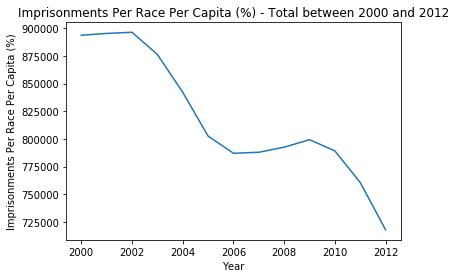

In [13]:
#IMPRISONMENTS TOTAL COUNT FOR ALL RACES AND ALL GENDERS COMBINED
imprisonmentDf_totalImprisonments = pd.DataFrame(imprisonmentDf.groupby(["Year"])["Count"].sum())
plt.plot(imprisonmentDf_totalImprisonments.index, imprisonmentDf_totalImprisonments["Count"],)
plt.xlabel("Year")
plt.ylabel("Imprisonments Per Race Per Capita (%)")
plt.title("Imprisonments Per Race Per Capita (%) - Total between 2000 and 2012")
plt.savefig('../Graphs/Imprisonments Total - Total between 2000 and 2012.png')


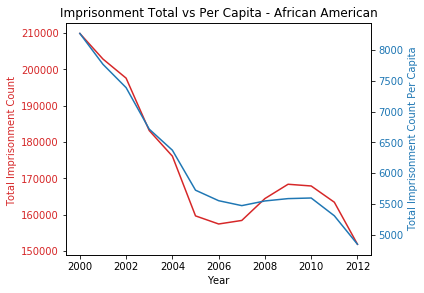

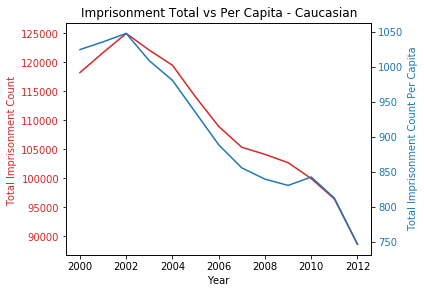

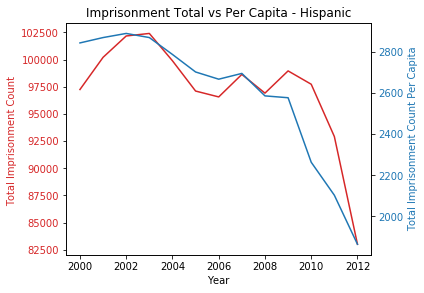

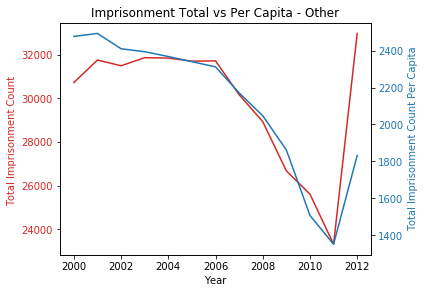

In [14]:
#IMPRINSONMENTS TOTAL VS PER CAPITA - ALL 4

for i in raceList:
    saveTitle = "Imprisonment Total vs Per Capita - " + i
    saveDestination = "../Graphs/" + saveTitle
    
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Total Imprisonment Count ', color=color)
    ax1.plot(imprisonmentDf_total_PerRace.index, imprisonmentDf_total_PerRace[i], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Total Imprisonment Count Per Capita', color=color)  # we already handled the x-label with ax1
    ax2.plot(imprisonmentDf_perRace_perCapita.index, imprisonmentDf_perRace_perCapita[i], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(saveTitle)

    fig.savefig(saveDestination)
   

In [15]:
print(imprisonmentDf_total_PerRace)
print(imprisonmentDf_perRace_perCapita)

      African American  Caucasian  Hispanic  Other
Year                                              
2000            209901     118229     97241  30723
2001            202851     121663    100203  31753
2002            197599     124976    102168  31490
2003            183179     122086    102401  31862
2004            176131     119488     99885  31843
2005            159697     114019     97100  31702
2006            157468     108938     96559  31714
2007            158443     105338     98630  30165
2008            164465     104121     96909  28929
2009            168401     102689     98953  26675
2010            167926      99951     97726  25607
2011            163458      96438     92916  23311
2012            151890      88618     83001  32972
      African American  Caucasian  Hispanic  Other
Year                                              
2000              8270       1025      2842   2477
2001              7768       1036      2868   2493
2002              7389       10

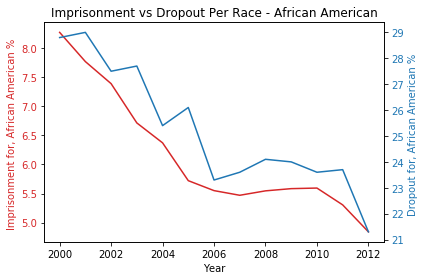

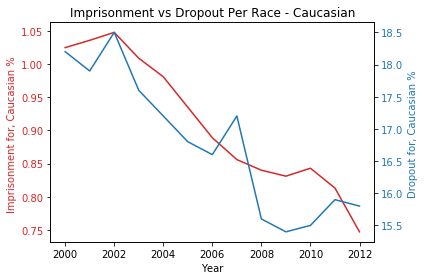

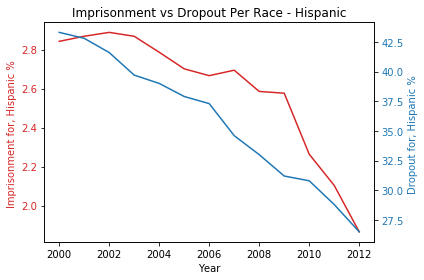

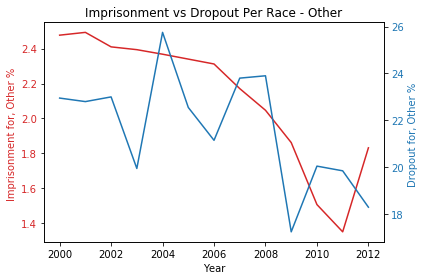

In [16]:
#IMPRISONMENTS VS DROPOUTS - ALL 4
for i in range(len(raceList)):
    saveTitle = "Imprisonment vs Dropout Per Race - " + raceList[i]
    ylable1 = "Imprisonment for, " + raceList[i] + " % "
    ylable2 = "Dropout for, " + raceList[i] + " % "
    saveDestination = "../Graphs/" + saveTitle

    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.set_ylabel(ylable1, color=color)
    ax1.plot(imprisonmentDf_perRace_perCapita.index, imprisonmentDf_perRace_perCapita[raceList[i]]/1000, color=color)
    ax1.tick_params(axis='y', labelcolor=color)


    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(ylable2, color=color)  # we already handled the x-label with ax1
    ax2.plot(dropOut_df.index, dropOut_df[raceList[i]], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(saveTitle)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    fig.savefig(saveDestination)

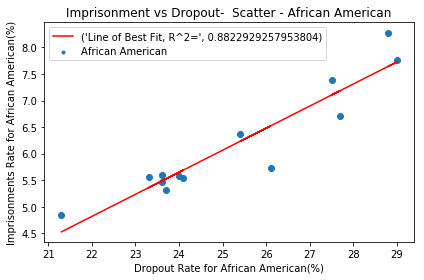

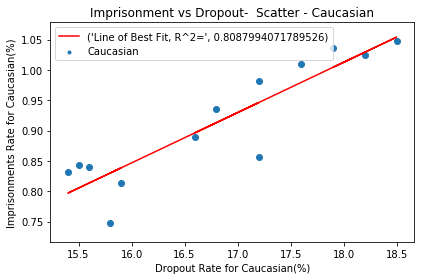

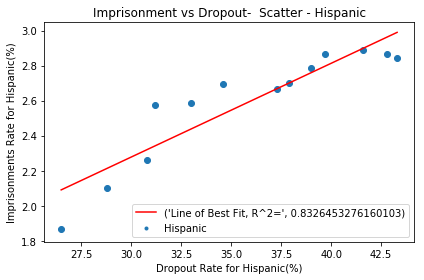

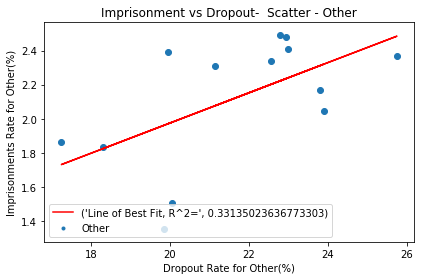

In [17]:
for i in range(len(raceList)):
    saveTitle = "Imprisonment vs Dropout-  Scatter - " + raceList[i]
    saveDestination = "../Graphs/" + saveTitle

    #plot scatter
    plt.scatter(dropOut_df[raceList[i]], imprisonmentDf_perRace_perCapita[raceList[i]]/1000)
    #create linregress
    slope, intercept, r_value, p_value, std_err = stats.linregress(dropOut_df[raceList[i]], imprisonmentDf_perRace_perCapita[raceList[i]]/1000)
    #plot line of best fit
    plt.plot(dropOut_df[raceList[i]], intercept + slope*dropOut_df[raceList[i]], 'r', label='fitted line')

    #format graph
    xlabel = "Dropout Rate for " + raceList[i] + "(%)"
    plt.xlabel(xlabel)
    ylabel = "Imprisonments Rate for " + raceList[i] + "(%)"
    plt.ylabel(ylabel)
    rValueLab = "Line of Best Fit, R^2=", r_value**2
    plt.legend(labels=[rValueLab, raceList[i]], loc="best", markerscale=.5)
    #plt.text(30, 0, r_value**2, fontdict=None, withdash=False)

    plt.title(saveTitle)
    plt.tight_layout()  # otherwise the right y-label is slightly clipped
    #plt.figure(figsize=(100,50))
    plt.savefig(saveDestination)
    plt.show()

In [64]:
for i in range(len(raceList)):
    print(dropOut_df[raceList[i]]),
    print(imprisonmentDf_perRace_perCapita[raceList[i]]/1000)    

Year
2000    28.8
2001    29.0
2002    27.5
2003    27.7
2004    25.4
2005    26.1
2006    23.3
2007    23.6
2008    24.1
2009    24.0
2010    23.6
2011    23.7
2012    21.3
Name: African American, dtype: float64
Year
2000    8.270
2001    7.768
2002    7.389
2003    6.714
2004    6.372
2005    5.722
2006    5.551
2007    5.471
2008    5.547
2009    5.585
2010    5.595
2011    5.306
2012    4.843
Name: African American, dtype: float64
Year
2000    18.2
2001    17.9
2002    18.5
2003    17.6
2004    17.2
2005    16.8
2006    16.6
2007    17.2
2008    15.6
2009    15.4
2010    15.5
2011    15.9
2012    15.8
Name: Caucasian, dtype: float64
Year
2000    1.025
2001    1.036
2002    1.048
2003    1.009
2004    0.981
2005    0.935
2006    0.889
2007    0.856
2008    0.840
2009    0.831
2010    0.843
2011    0.813
2012    0.747
Name: Caucasian, dtype: float64
Year
2000    43.3
2001    42.8
2002    41.6
2003    39.7
2004    39.0
2005    37.9
2006    37.3
2007    34.6
2008    33.0
2009    31.2
2

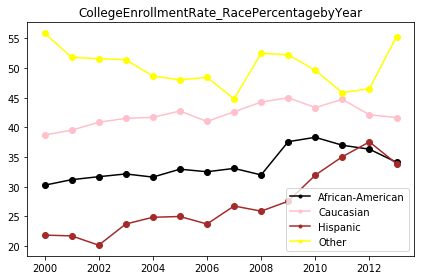

In [51]:
CollegeEnrollmentRate_RacePercentagebyYear = pd.read_csv("../CSVs/College Enrollment Rate - RacePercentage by Year.csv")
CollegeEnrollmentRate_RacePercentagebyYear
plt.plot(CollegeEnrollmentRate_RacePercentagebyYear["Year"], CollegeEnrollmentRate_RacePercentagebyYear["African-American"], '-o', color='black')
plt.plot(CollegeEnrollmentRate_RacePercentagebyYear["Year"], CollegeEnrollmentRate_RacePercentagebyYear["Caucasian"], '-o', color='pink')
plt.plot(CollegeEnrollmentRate_RacePercentagebyYear["Year"], CollegeEnrollmentRate_RacePercentagebyYear["Hispanic"], '-o', color='brown')
plt.plot(CollegeEnrollmentRate_RacePercentagebyYear["Year"], CollegeEnrollmentRate_RacePercentagebyYear["Other"], '-o', color='yellow')
plt.legend(labels=["African-American", "Caucasian", "Hispanic", "Other"], loc="best", markerscale=.5)
plt.title("CollegeEnrollmentRate_RacePercentagebyYear")
plt.tight_layout()
plt.savefig('../Graphs/CollegeEnrollmentRate_RacePercentagebyYear.png')
plt.show()

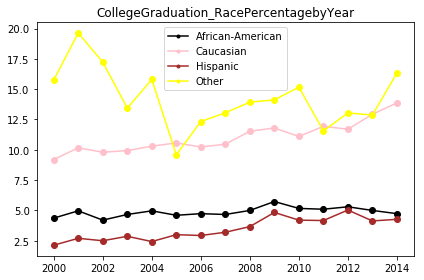

In [52]:
CollegeGraduation_RacePercentagebyYear = pd.read_csv("../CSVs/College Graduation - RacePercentage by Year.csv")
CollegeGraduation_RacePercentagebyYear = CollegeGraduation_RacePercentagebyYear.set_index("Year")
plt.plot(CollegeGraduation_RacePercentagebyYear.index, CollegeGraduation_RacePercentagebyYear["African-American"], '-o', color='black')
plt.plot(CollegeGraduation_RacePercentagebyYear.index, CollegeGraduation_RacePercentagebyYear["Caucasian"], '-o', color='pink')
plt.plot(CollegeGraduation_RacePercentagebyYear.index, CollegeGraduation_RacePercentagebyYear["Hispanic"], '-o', color='brown')
plt.plot(CollegeGraduation_RacePercentagebyYear.index, CollegeGraduation_RacePercentagebyYear["Other"], '-o', color='yellow')
plt.legend(labels=CollegeGraduation_RacePercentagebyYear.columns, loc="best", markerscale=.5)
plt.title("CollegeGraduation_RacePercentagebyYear")
plt.tight_layout()
plt.savefig('../Graphs/CollegeGraduation_RacePercentagebyYear.png')
plt.show()

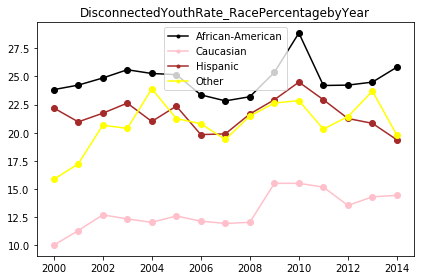

In [53]:
DisconnectedYouthRate_RacePercentagebyYear = pd.read_csv("../CSVs/Disconnected Youth Rate - RacePercentage by Year.csv")
DisconnectedYouthRate_RacePercentagebyYear = DisconnectedYouthRate_RacePercentagebyYear.set_index("Year")
plt.plot(DisconnectedYouthRate_RacePercentagebyYear.index, DisconnectedYouthRate_RacePercentagebyYear["African-American"], '-o', color='black')
plt.plot(DisconnectedYouthRate_RacePercentagebyYear.index, DisconnectedYouthRate_RacePercentagebyYear["Caucasian"], '-o', color='pink')
plt.plot(DisconnectedYouthRate_RacePercentagebyYear.index, DisconnectedYouthRate_RacePercentagebyYear["Hispanic"], '-o', color='brown')
plt.plot(DisconnectedYouthRate_RacePercentagebyYear.index, DisconnectedYouthRate_RacePercentagebyYear["Other"], '-o', color='yellow')
plt.legend(labels=DisconnectedYouthRate_RacePercentagebyYear.columns, loc="best", markerscale=.5)
plt.title("DisconnectedYouthRate_RacePercentagebyYear")
plt.tight_layout()
plt.savefig('../Graphs/DisconnectedYouthRate_RacePercentagebyYear.png')
plt.show()

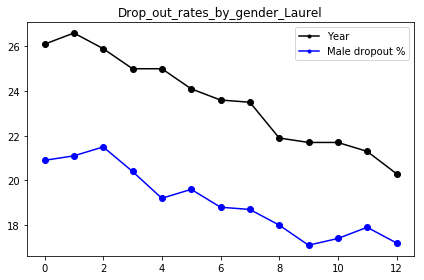

In [42]:
Drop_out_rates_by_gender_Laurel = pd.read_csv("../CSVs/Drop_out_rates_by_gender_Laurel.csv")
Drop_out_rates_by_gender_Laurel.set_index("Year")
plt.plot(Drop_out_rates_by_gender_Laurel.index, Drop_out_rates_by_gender_Laurel["Male dropout %"], '-o', color='black')
plt.plot(Drop_out_rates_by_gender_Laurel.index, Drop_out_rates_by_gender_Laurel["Female dropout %"], '-o', color='blue')
plt.legend(labels=Drop_out_rates_by_gender_Laurel.columns, loc="best", markerscale=.5)
plt.title("Drop_out_rates_by_gender_Laurel")
plt.tight_layout()
plt.savefig('../Graphs/Drop_out_rates_by_gender_Laurel.png')
plt.show()

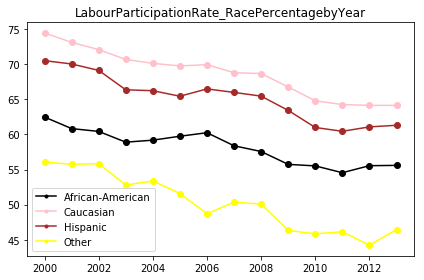

In [54]:
LabourParticipationRate_RacePercentagebyYear = pd.read_csv("../CSVs/Labour Participation Rate - RacePercentage by Year.csv")
LabourParticipationRate_RacePercentagebyYear = LabourParticipationRate_RacePercentagebyYear.set_index("Year")
plt.plot(LabourParticipationRate_RacePercentagebyYear.index, LabourParticipationRate_RacePercentagebyYear["African-American"], '-o', color='black')
plt.plot(LabourParticipationRate_RacePercentagebyYear.index, LabourParticipationRate_RacePercentagebyYear["Caucasian"], '-o', color='pink')
plt.plot(LabourParticipationRate_RacePercentagebyYear.index, LabourParticipationRate_RacePercentagebyYear["Hispanic"], '-o', color='brown')
plt.plot(LabourParticipationRate_RacePercentagebyYear.index, LabourParticipationRate_RacePercentagebyYear["Other"], '-o', color='yellow')
plt.legend(labels=LabourParticipationRate_RacePercentagebyYear.columns, loc="best", markerscale=.5)
plt.title("LabourParticipationRate_RacePercentagebyYear")
plt.tight_layout()
plt.savefig('../Graphs/LabourParticipationRate_RacePercentagebyYear.png')
plt.show()

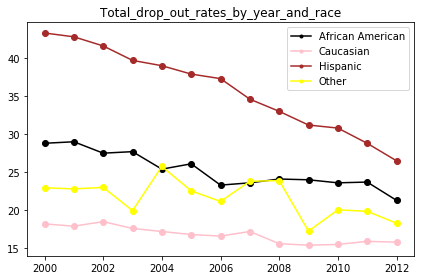

In [44]:
dropOut_df
plt.plot(dropOut_df.index, dropOut_df["African American"], '-o', color='black')
plt.plot(dropOut_df.index, dropOut_df["Caucasian"], '-o', color='pink')
plt.plot(dropOut_df.index, dropOut_df["Hispanic"], '-o', color='brown')
plt.plot(dropOut_df.index, dropOut_df["Other"], '-o', color='yellow')
plt.legend(labels=dropOut_df.columns, loc="best", markerscale=.5)
plt.title("Total_drop_out_rates_by_year_and_race")
plt.tight_layout()
plt.savefig('../Graphs/Total_drop_out_rates_by_year_and_race.png')
plt.show()

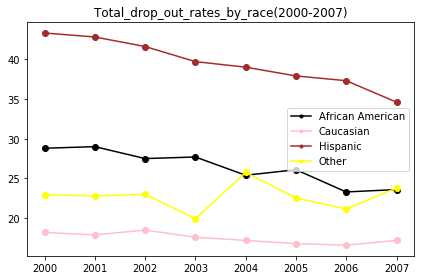

In [45]:
dropOut_00_07_df
plt.plot(dropOut_00_07_df.index, dropOut_00_07_df["African American"], '-o', color='black')
plt.plot(dropOut_00_07_df.index, dropOut_00_07_df["Caucasian"], '-o', color='pink')
plt.plot(dropOut_00_07_df.index, dropOut_00_07_df["Hispanic"], '-o', color='brown')
plt.plot(dropOut_00_07_df.index, dropOut_00_07_df["Other"], '-o', color='yellow')
plt.legend(labels=dropOut_00_07_df.columns, loc="best", markerscale=.5)
plt.title("Total_drop_out_rates_by_race(2000-2007)")
plt.tight_layout()
plt.savefig('../Graphs/Total_drop_out_rates_by_race(2000-2007).png')
plt.show()


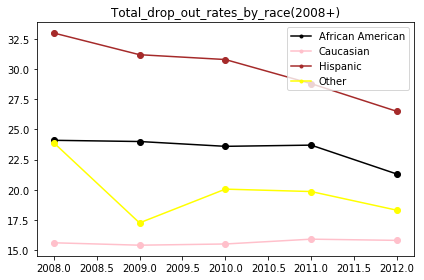

In [46]:
dropOut_08Plus_df
plt.plot(dropOut_08Plus_df.index, dropOut_08Plus_df["African American"], '-o', color='black')
plt.plot(dropOut_08Plus_df.index, dropOut_08Plus_df["Caucasian"], '-o', color='pink')
plt.plot(dropOut_08Plus_df.index, dropOut_08Plus_df["Hispanic"], '-o', color='brown')
plt.plot(dropOut_08Plus_df.index, dropOut_08Plus_df["Other"], '-o', color='yellow')
plt.legend(labels=dropOut_08Plus_df.columns, loc="best", markerscale=.5)
plt.title("Total_drop_out_rates_by_race(2008+)")
plt.tight_layout()
plt.savefig('../Graphs/Total_drop_out_rates_by_race(2008+).png')
plt.show()

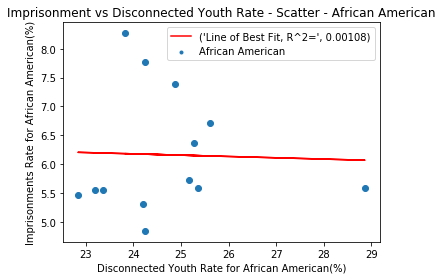

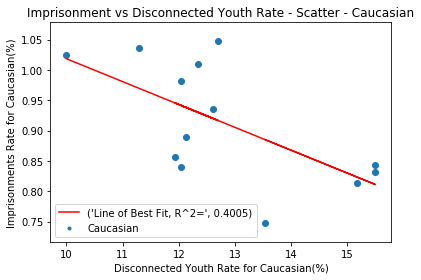

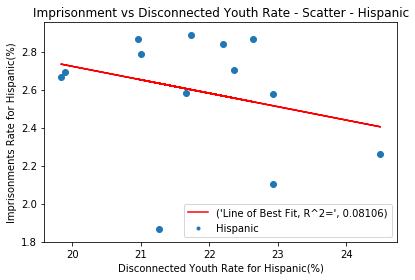

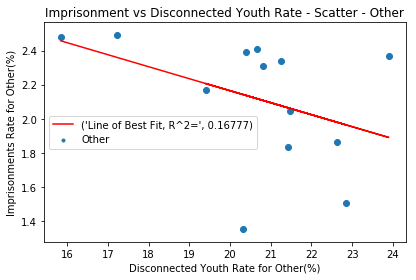

In [87]:
DisconnectedYouthRate_RacePercentagebyYear = DisconnectedYouthRate_RacePercentagebyYear.rename(columns={"African-American" : "African American"})
DisconnectedYouthRate_RacePercentagebyYear = DisconnectedYouthRate_RacePercentagebyYear.loc[imprisonmentDf_perRace_perCapita.index < 2013]


for i in range(len(raceList)):
    saveTitle = "Imprisonment vs Disconnected Youth Rate - Scatter - " + raceList[i]
    saveDestination = "../Graphs/" + saveTitle

    #plot scatter
    plt.scatter(DisconnectedYouthRate_RacePercentagebyYear[raceList[i]], imprisonmentDf_perRace_perCapita[raceList[i]]/1000)
    #create linregress
    slope, intercept, r_value, p_value, std_err = stats.linregress(DisconnectedYouthRate_RacePercentagebyYear[raceList[i]], imprisonmentDf_perRace_perCapita[raceList[i]]/1000)
    #plot line of best fit
    plt.plot(DisconnectedYouthRate_RacePercentagebyYear[raceList[i]], intercept + slope*DisconnectedYouthRate_RacePercentagebyYear[raceList[i]], 'r', label='fitted line')

    #format graph
    xlabel = "Disconnected Youth Rate for " + raceList[i] + "(%)"
    plt.xlabel(xlabel)
    ylabel = "Imprisonments Rate for " + raceList[i] + "(%)"
    plt.ylabel(ylabel)
    rValueLab = "Line of Best Fit, R^2=", round(r_value**2, 5)
    plt.legend(labels=[rValueLab, raceList[i]], loc="best", markerscale=.5)
    #plt.text(30, 0, r_value**2, fontdict=None, withdash=False)

    plt.title(saveTitle)
    plt.tight_layout()  # otherwise the right y-label is slightly clipped
    #plt.figure(figsize=(100,50))
    plt.savefig(saveDestination)
    plt.show()

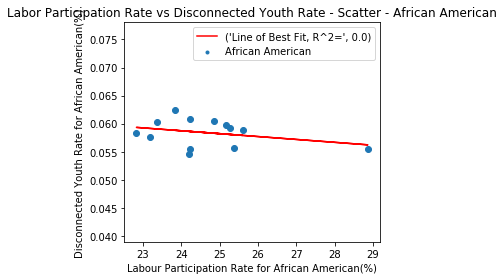

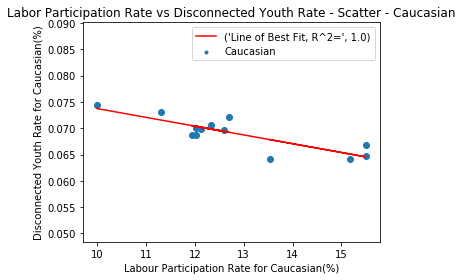

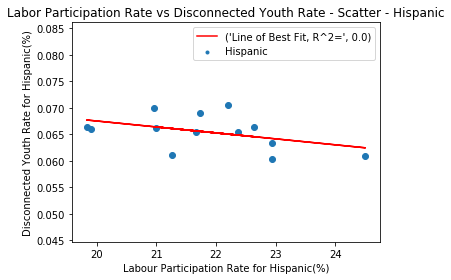

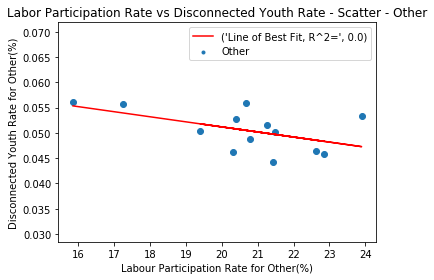

In [90]:
LabourParticipationRate_RacePercentagebyYear = LabourParticipationRate_RacePercentagebyYear.rename(columns={"African-American" : "African American"})
LabourParticipationRate_RacePercentagebyYear = LabourParticipationRate_RacePercentagebyYear.loc[LabourParticipationRate_RacePercentagebyYear.index < 2013]

for i in range(len(raceList)):
    saveTitle = "Labor Participation Rate vs Disconnected Youth Rate - Scatter - " + raceList[i]
    saveDestination = "../Graphs/" + saveTitle

    #plot scatter
    plt.scatter(DisconnectedYouthRate_RacePercentagebyYear[raceList[i]], LabourParticipationRate_RacePercentagebyYear[raceList[i]]/1000)
    #create linregress
    slope, intercept, r_value, p_value, std_err = stats.linregress(DisconnectedYouthRate_RacePercentagebyYear[raceList[i]], LabourParticipationRate_RacePercentagebyYear[raceList[i]]/1000)
    #plot line of best fit
    plt.plot(DisconnectedYouthRate_RacePercentagebyYear[raceList[i]], intercept + slope*DisconnectedYouthRate_RacePercentagebyYear[raceList[i]], 'r', label='fitted line')

    #format graph
    xlabel = "Labour Participation Rate for " + raceList[i] + "(%)"
    plt.xlabel(xlabel)
    ylabel = "Disconnected Youth Rate for " + raceList[i] + "(%)"
    plt.ylabel(ylabel)
    rValueLab = "Line of Best Fit, R^2=", round(r_value**2)
    plt.legend(labels=[rValueLab, raceList[i]], loc="best", markerscale=.5)
    #plt.text(30, 0, r_value**2, fontdict=None, withdash=False)

    plt.title(saveTitle)
    plt.tight_layout()  # otherwise the right y-label is slightly clipped
    #plt.figure(figsize=(100,50))
    plt.savefig(saveDestination)
    plt.show()


In [82]:
#print(imprisonmentDf_perRace_perCapita/1000)
#print(DisconnectedYouthRate_RacePercentagebyYear)
print(LabourParticipationRate_RacePercentagebyYear)

      African American  Caucasian   Hispanic      Other
Year                                                   
2000         62.457143  74.400000  70.471429  56.071429
2001         60.814286  73.071429  70.000000  55.742857
2002         60.414286  72.042857  69.085714  55.828571
2003         58.885714  70.642857  66.328571  52.800000
2004         59.171429  70.085714  66.200000  53.371429
2005         59.728571  69.728571  65.414286  51.585714
2006         60.228571  69.900000  66.457143  48.714286
2007         58.371429  68.757143  65.957143  50.357143
2008         57.557143  68.642857  65.428571  50.085714
2009         55.728571  66.728571  63.400000  46.342857
2010         55.514286  64.771429  60.971429  45.857143
2011         54.542857  64.228571  60.428571  46.157143
2012         55.542857  64.114286  61.057143  44.242857


In [65]:
imprisonmentDf_00_07_perRace_perCapita_percent = imprisonmentDf_perRace_perCapita.loc[imprisonmentDf_perRace_perCapita.index < 2008]/1000

imprisonmentDf_08Plus_perRace_perCapita_percent = imprisonmentDf_perRace_perCapita.loc[imprisonmentDf_perRace_perCapita.index > 2007]/1000

print(imprisonmentDf_00_07_perRace_perCapita_percent)
print(dropOut_00_07_df)
print(imprisonmentDf_08Plus_perRace_perCapita_percent)
print(dropOut_08Plus_df)

      African American  Caucasian  Hispanic  Other
Year                                              
2000             8.270      1.025     2.842  2.477
2001             7.768      1.036     2.868  2.493
2002             7.389      1.048     2.888  2.410
2003             6.714      1.009     2.868  2.394
2004             6.372      0.981     2.786  2.368
2005             5.722      0.935     2.701  2.340
2006             5.551      0.889     2.666  2.312
2007             5.471      0.856     2.694  2.171
      African American  Caucasian  Hispanic  Other
Year                                              
2000              28.8       18.2      43.3  22.95
2001              29.0       17.9      42.8  22.80
2002              27.5       18.5      41.6  23.00
2003              27.7       17.6      39.7  19.95
2004              25.4       17.2      39.0  25.75
2005              26.1       16.8      37.9  22.55
2006              23.3       16.6      37.3  21.15
2007              23.6       17

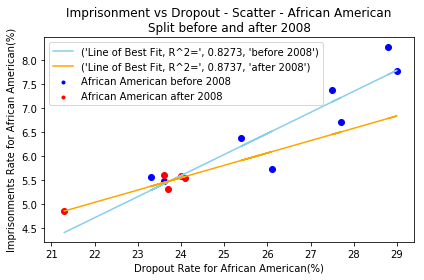

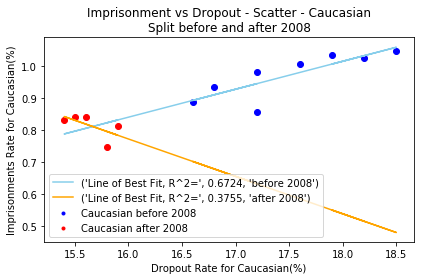

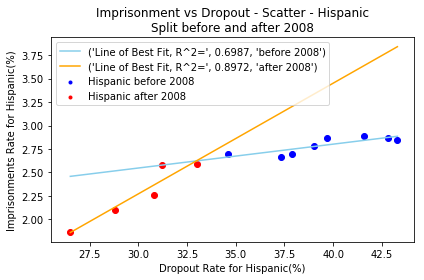

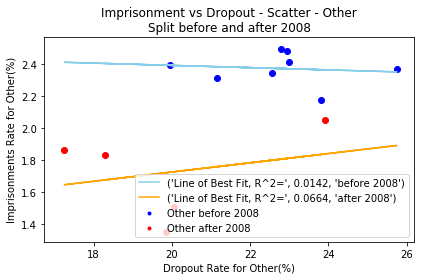

In [48]:


for i in range(len(raceList)):
    saveTitle = "Imprisonment vs Dropout - Scatter - " + raceList[i] + "\nSplit before and after 2008"
    title = "Imprisonment vs Dropout - Scatter - " + raceList[i] + "Split before and after 2008"
    saveDestination = "../Graphs/" + saveTitle

    #x-drop out rate
    #y-imprisonment rate
    
    #plot scatter for 2000-2007
    plt.scatter(dropOut_00_07_df[raceList[i]], imprisonmentDf_00_07_perRace_perCapita_percent[raceList[i]], color = "blue")
    #create linregress
    slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(dropOut_00_07_df[raceList[i]], imprisonmentDf_00_07_perRace_perCapita_percent[raceList[i]])
    #plot line of best fit
    plt.plot(dropOut_df[raceList[i]], intercept1 + slope1*dropOut_df[raceList[i]], 'skyblue', label='fitted line')

    #plot scatter for 2008-20012
    plt.scatter(dropOut_08Plus_df[raceList[i]], imprisonmentDf_08Plus_perRace_perCapita_percent[raceList[i]], color = "red")
    #create linregress
    slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(dropOut_08Plus_df[raceList[i]], imprisonmentDf_08Plus_perRace_perCapita_percent[raceList[i]])
    #plot line of best fit
    plt.plot(dropOut_df[raceList[i]], intercept2 + slope2*dropOut_df[raceList[i]], 'orange', label='fitted line')

    
    
    #format graph
    xlabel = "Dropout Rate for " + raceList[i] + "(%)"
    plt.xlabel(xlabel)
    ylabel = "Imprisonments Rate for " + raceList[i] + "(%)"
    plt.ylabel(ylabel)
    
    rValueLab1 = "Line of Best Fit, R^2=", round(r_value1**2, 4), "before 2008"
    rValueLab2 = "Line of Best Fit, R^2=", round(r_value2**2, 4), "after 2008"
    plt.legend(labels=[rValueLab1, rValueLab2, raceList[i] + " before 2008", raceList[i] + " after 2008"], loc="best", markerscale=.5)
    #plt.text(30, 0, r_value**2, fontdict=None, withdash=False)

    plt.title(saveTitle)
    plt.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.savefig(saveDestination)
    plt.show()
    

    #fig.savefig(saveDestination)

In [104]:
ylable1 = "Imprisonment for, " + raceList[i] + " % "
    ylable2 = "Dropout for, " + raceList[i] + " % "

    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.set_ylabel(ylable1, color=color)
    ax1.scatter(dropOut_08Plus_df[raceList[i]], imprisonmentDf_perRace_perCapita[raceList[i]]/1000)

    ax1.plot(imprisonmentDf_perRace_perCapita.index, imprisonmentDf_perRace_perCapita[raceList[i]]/1000, color=color)
    ax1.tick_params(axis='y', labelcolor=color)


    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(ylable2, color=color)  # we already handled the x-label with ax1
    ax2.plot(dropOut_df.index, dropOut_df[raceList[i]], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(title)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped

IndentationError: unexpected indent (<ipython-input-104-da35b9b3d2a0>, line 2)

In [120]:
dropOutList = []
imprisonmentList = []
#for i in range(len(raceList)):
 #   dropOutList.append(dropOut_df[raceList[i]]),
  #  imprisonmentList.append(imprisonmentDf_perRace_perCapita[raceList[i]]/1000)    

#imprisonmentList = imprisonmentList.select_dtypes(include=['int'])
dropOutList
#print(imprisonmentList)


[Year
 2000    28.8
 2001    29.0
 2002    27.5
 2003    27.7
 2004    25.4
 2005    26.1
 2006    23.3
 2007    23.6
 2008    24.1
 2009    24.0
 2010    23.6
 2011    23.7
 2012    21.3
 Name: African American, dtype: float64, Year
 2000    18.2
 2001    17.9
 2002    18.5
 2003    17.6
 2004    17.2
 2005    16.8
 2006    16.6
 2007    17.2
 2008    15.6
 2009    15.4
 2010    15.5
 2011    15.9
 2012    15.8
 Name: Caucasian, dtype: float64, Year
 2000    43.3
 2001    42.8
 2002    41.6
 2003    39.7
 2004    39.0
 2005    37.9
 2006    37.3
 2007    34.6
 2008    33.0
 2009    31.2
 2010    30.8
 2011    28.8
 2012    26.5
 Name: Hispanic, dtype: float64, Year
 2000    22.95
 2001    22.80
 2002    23.00
 2003    19.95
 2004    25.75
 2005    22.55
 2006    21.15
 2007    23.80
 2008    23.90
 2009    17.25
 2010    20.05
 2011    19.85
 2012    18.30
 Name: Other, dtype: float64]

,African American,Caucasian,Hispanic,Other
Year,,,,
2000,28.8,18.2,43.3,22.95
2001,29.0,17.9,42.8,22.80
2002,27.5,18.5,41.6,23.00
2003,27.7,17.6,39.7,19.95
2004,25.4,17.2,39.0,25.75
2005,26.1,16.8,37.9,22.55
2006,23.3,16.6,37.3,21.15
2007,23.6,17.2,34.6,23.80
2008,24.1,15.6,33.0,23.90


In [121]:
plt.scatter(dropOutList, imprisonmentList/1000)
#print(dropOut_df)
#slope, intercept, r_value, p_value, std_err = stats.linregress(dropOut_df, imprisonmentDf_perRace_perCapita)

#plt.plot(dropOut_df, intercept + slope*dropOut_df, 'r', label='fitted line')
xlabel = "Dropout Rate for "# + raceList[i] + "(%)"
plt.xlabel(xlabel)
ylabel = "Imprisonments Rate for "# + raceList[i] + "(%)"
plt.ylabel(ylabel)
#rValueLab = "R^2=", round(r_value**2, 5)
#saveTitle = "Imprisonment vs Dropout - Scatter - " + "Combined: " + str(rValueLab)
#plt.title(saveTitle)

#saveDestination = "../Graphs/" + saveTitle
#plt.tight_layout()
#plt.savefig(saveDestination)

df = pd.DataFrame(
    {
        "Dropout" :
        dropOut_df
        
        “Col2” :
        values2.value_counts(),
        
        “Col2” :
        values2.mean()
    }
)

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [ ]:
plt.scatter(dropOut_df, imprisonmentDf_perRace_perCapita/1000)
#print(dropOut_df)
#slope, intercept, r_value, p_value, std_err = stats.linregress(dropOut_df, imprisonmentDf_perRace_perCapita)

#plt.plot(dropOut_df, intercept + slope*dropOut_df, 'r', label='fitted line')
xlabel = "Dropout Rate for "# + raceList[i] + "(%)"
plt.xlabel(xlabel)
ylabel = "Imprisonments Rate for "# + raceList[i] + "(%)"
plt.ylabel(ylabel)
#rValueLab = "R^2=", round(r_value**2, 5)
#saveTitle = "Imprisonment vs Dropout - Scatter - " + "Combined: " + str(rValueLab)
#plt.title(saveTitle)

#saveDestination = "../Graphs/" + saveTitle
#plt.tight_layout()
#plt.savefig(saveDestination)


In [60]:
ImprisonmentsMale = imprisonmentDf[imprisonmentDf.Sex == 'Male']
ImprisonmentsMale

ImprisonmentsFemale = imprisonmentDf[imprisonmentDf.Sex == 'Female']
ImprisonmentsFemale

,Year,Race/Ethnicity,Sex,Count,"Per Capita Rate per 100,000"
26,2000,None,Female,9089,67
27,2001,None,Female,9724,71
28,2002,None,Female,10336,74
29,2003,None,Female,10396,73
30,2004,None,Female,10464,73
31,2005,None,Female,10713,75
32,2006,None,Female,10768,75
33,2007,None,Female,11044,76
34,2008,None,Female,11036,75
35,2009,None,Female,11186,76
